In [1]:
#Se importan las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Se lee el archivo
df9 = pd.read_csv('sahuaripa', skiprows=19, sep='\s+',header=None,names=["FECHA","PRECIP","EVAP","TMAX","TMIN"])

In [3]:
#Se crea el data frame 
df9 = pd.DataFrame(df9)

In [4]:
#Se vuelven los valores numericos
cols = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
df9[cols] = df9[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df9['FECHA'] = pd.to_datetime(df9.apply(lambda x: x['FECHA'], 1), dayfirst=True)

In [5]:
#Se crean columnas del mes y del año por separado
df9['MES'] = df9['FECHA'].dt.month
df9['AÑO'] = df9['FECHA'].dt.year
df9['DIA'] = df9['FECHA'].dt.day

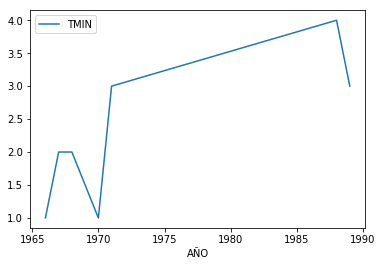

In [6]:
#Se calcula el índice FD --------> Número de días por año donde la Tmin<0
#Se excluyen los datos donde la TMIN es mayor que 0 y se da una tabla con los datos
dfFD = df9[df9.TMIN < 0]
#Se re-define la columna dfFD como únicamente los datos de las columnas que nos importan  
dfFD = dfFD[['TMIN','AÑO']]
#Se redifine dfFD como la frecuencia de los años que sería el número de días frios durante la toma de datos  
dfFD = dfFD.groupby('AÑO').count()
##dfFD.groupby('AÑO').size().plot(kind='bar') -----> May work in another case but in this one is pretty  much useless 
#Se vuelve un integer los index
dfFD.index = dfFD.index.astype(int)
#Se gráfica dfFD 
dfFD.plot()

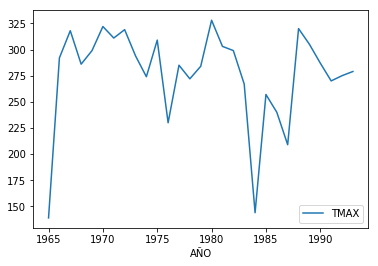

In [7]:
#Calculando el índice SU  ------> Número de días por año donde la Tmax>25
dfSU = df9[df9.TMAX>25]
#Se repite el proceso 
dfSU = dfSU[['TMAX','AÑO']]
dfSU = dfSU.groupby('AÑO').count()
dfSU.index = dfSU.index.astype(int)
dfSU.plot()

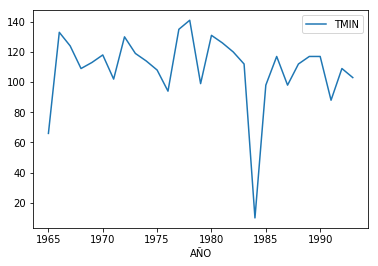

In [8]:
#Calculando el índice TR  ------> (Número de noches tropicales) días por año donde Tmin>20
dfTR = df9[df9.TMIN>20]
#Se repite el proceso
dfTR = dfTR[['TMIN','AÑO']]
dfTR = dfTR.groupby('AÑO').count()
dfTR.plot()

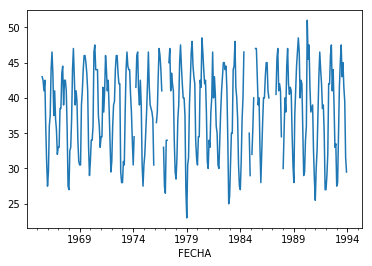

In [9]:
#Calculando el índice Txx ------> La máxima mensual de la temperatura máxima Tmax 
#Se define un dataframe donde Tmax y meses 
dfTxx = df9[['FECHA','TMAX']]
   ##dfTxx =
  ########fTxx.loc[dfTxx.groupby('M')["TMAX"].idxmax()]
   #TRASHBUT MAYUSEFUL LATER    ##########dfTxx.index = pd.to_datetime(dfTxx.index)   #-----> IMPORTANTE¿?
  ####dfTxx = 
#Se redifine el df poniendo el maximo de TMAX por mes
dfTxx = dfTxx.set_index('FECHA').resample('M')["TMAX"].max()
#Se gràfica
dfTxx.plot(x="FECHA",y=["TMAX"])

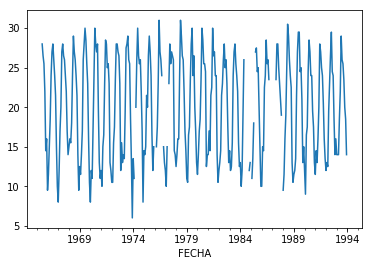

In [10]:
#Calculando el índice Tnx -----> La máxima mensual de la temperatura mínima
dfTnx = df9[['FECHA','TMIN']]
dfTnx = dfTnx.set_index('FECHA').resample('M')["TMIN"].max()
dfTnx.plot(x="FECHA",y=["TMIN"])

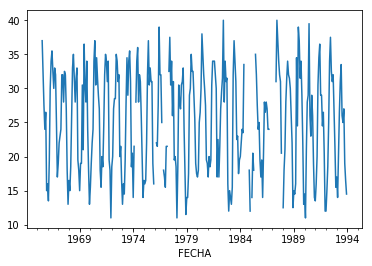

In [11]:
#Calculando el indice TXn -----> EL mìnimo mensual de la temperatura màxima
dfTXn = df9[['FECHA','TMAX']]
dfTXn = dfTXn.set_index('FECHA').resample('M')["TMAX"].min()
dfTXn.plot(x="FECHA",y=["TMAX"])

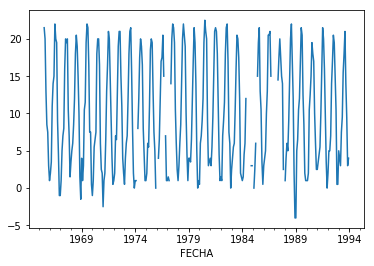

In [12]:
#Calculandop el índice TNn --------> Em mínimo mensual de la temperatura mìnima
dfTNn = df9[['FECHA','TMIN']]
dfTNn = dfTNn.set_index('FECHA').resample('M')["TMIN"].min()
dfTNn.plot(x="FECHA",y=["TMIN"])

In [13]:
pd.options.mode.chained_assignment = None #Se desactiva un advertencia que no me dejaba trabajar

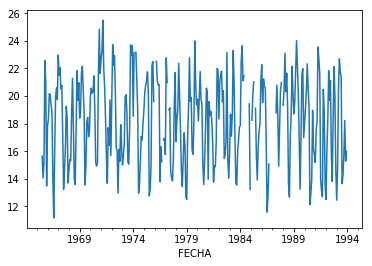

In [14]:
#Calculando el índice DTR ------->La diferencia entre TMAX y TMIN promedio por mes 
dfDTR = df9[['FECHA','TMAX','TMIN']]   #Se crea un dataframe con 3 columnas necesarias 
dfDTR['dif'] = dfDTR['TMAX'] - dfDTR['TMIN']
dfDTR = dfDTR.set_index('FECHA').resample('M')["dif"].mean()
dfDTR.plot()

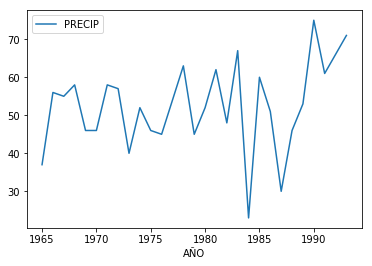

In [15]:
#Calculando SDII --->Número de días en un año con precipitación mayor igual a 1mm.
dfSDII = df9[df9.PRECIP>=1]
dfSDII = dfSDII[['PRECIP','AÑO']]
dfSDII = dfSDII.groupby('AÑO').count()
dfSDII.plot()

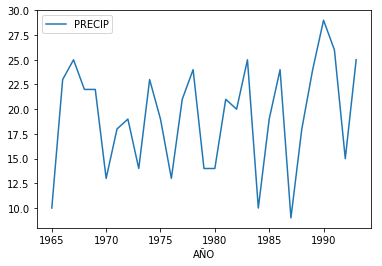

In [16]:
#Calculando R10mm ----> Nùmero de dìas en el año con precipitaciòn mayor o igual a 10
dfR10mm = df9[df9.PRECIP>=10]
dfR10mm = dfR10mm[['PRECIP','AÑO']]
dfR10mm = dfR10mm.groupby('AÑO').count()
dfR10mm.plot()

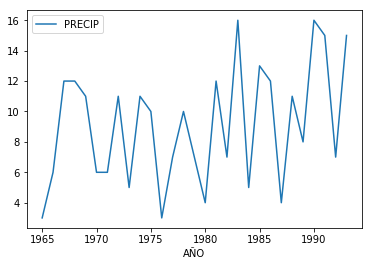

In [17]:
#Calculando R20mm ----> Nùmero de dìas en el año con precipitaciòn mayor o igual a 20
dfR20mm = df9[df9.PRECIP>=20]
dfR20mm = dfR20mm[['PRECIP','AÑO']]
dfR20mm = dfR20mm.groupby('AÑO').count()
dfR20mm.plot()

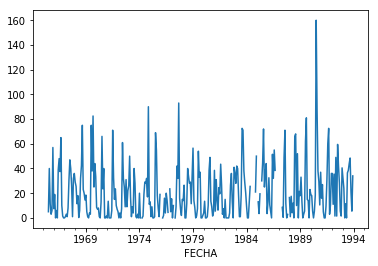

In [18]:
#Calculando RX1Day -------> PRecip por dìa max mensual
DX1Day = df9[['FECHA','PRECIP']]
DX1Day = DX1Day.set_index('FECHA').resample('M')["PRECIP"].max()
DX1Day.plot(x="FECHA", y=["PRECIP"])

In [19]:
#Calculando CDD -----> Nùmero consecutivo de dìas secos precip<1
#CDD = df9[["PRECIP", "DIA"]]
#Dejamos ùnicamente la precipitación 
#CDD = CDD[["PRECIP","FECHA"]]
                       #######################a = df9.values
                       #######################np.bincount((a).cumsum()[a]).max()
#CDD = CDD.groupby(CDD['PRECIP'].cumsum()).agg(
 #   {'FECHA': ['count', 'min', 'max']})

#CDD.columns = CDD.columns.droplevel()
#CDD[CDD['count']==CDD['count'].max()]

In [20]:
i = df9['PRECIP'] < 1
j = i.ne(i.shift()).cumsum()

CDD = j[i].value_counts().max()
CDD
#Usando verdadero o falso y un array i calculamos la màxima suma consecutiva de dias donde la precipitaciòn es 
#menor a 1

167

In [21]:
#CWD ---->Numero de  dìas consecutivos donde la precp >=1
i = df9['PRECIP'] >= 1
j = i.ne(i.shift()).cumsum()

CWD = j[i].value_counts().max()
CWD

11

In [53]:
#GSL 
GSL = df9[['FECHA','AÑO','DIA','MES']]
GSL['tmed'] = (df9['TMAX'] - df9['TMIN'])/2
#for i in range (1,10):
GSL = GSL[GSL.MES != 2]
GSL = GSL[GSL.MES != 3]
GSL = GSL[GSL.MES != 4]
GSL = GSL[GSL.MES != 5]
GSL = GSL[GSL.MES != 6]
GSL = GSL[GSL.MES != 7]
GSL = GSL[GSL.MES != 8]
GSL = GSL[GSL.MES != 9]
GSL = GSL[GSL.MES != 10]
GSL = GSL[GSL.MES != 11]
GSL = GSL[GSL.DIA != 1]

SyntaxError: invalid syntax (<ipython-input-53-e10837dbcfa3>, line 15)

In [52]:
GSL

,FECHA,AÑO,DIA,MES,tmed
133,1965-12-01,1965,1,12,4.25
134,1965-12-02,1965,2,12,8.75
135,1965-12-03,1965,3,12,9.50
136,1965-12-04,1965,4,12,9.75
137,1965-12-05,1965,5,12,10.75
138,1965-12-06,1965,6,12,9.25
139,1965-12-07,1965,7,12,11.50
140,1965-12-08,1965,8,12,6.25
141,1965-12-09,1965,9,12,6.75
142,1965-12-10,1965,10,12,3.75
